In [1]:
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
from copy import deepcopy

In [2]:
def load_sudoku(filename):
    with open(f"sudoku_boards/{filename}", "r") as file:
        return [[int(x) for x in (row[:-1] if row[-1]=='\n' else row)] for row in file.readlines()]

In [3]:
def show_sudoku(board):
    m = 360
    d = m // 9
    img = Image.new(mode="RGB", size=(m, m), color=(176, 165, 155))
    draw = ImageDraw.Draw(img)
    for i in range(9):
        draw.line([(i*d, 0), (i*d, m)], width=1, fill=(0, 0, 0))
        draw.line([(0, i*d), (m, i*d)], width=1, fill=(0, 0, 0))

    for i in range(1, 3):
        draw.line([(3*i*d, 0), (3*i*d, m)], width=3, fill=(0, 0, 0))
        draw.line([(0, 3*i*d), (m, 3*i*d)], width=3, fill=(0, 0, 0))

    font = ImageFont.truetype("arial.ttf", 20)
    for i in range(9):
        for j in range(9):
            fill_color = 'blue' if fixed[i][j] else 'red'
            draw.text((j*d + d/2.5, i*d + d/3.5), text=str(board[i][j]), font=font, fill=fill_color)
    display(img)

In [4]:
class Square:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.positions = []
        self.fill_positions()
        self.length = len(self.positions)

    def fill_positions(self):
        number = [False for _ in range(9)]
        empty_spots = []
        for i in range(self.x, self.x + 3):
            for j in range(self.y, self.y + 3):
                if fixed[i][j]:
                    number[sudoku[i][j] - 1] = True
                else:
                    empty_spots.append((i, j))

        for i in range(9):
            if not number[i]:
                pos = empty_spots.pop()
                self.positions.append(pos)
                sudoku[pos[0]][pos[1]] = i + 1

def initial_fill():
    sqr = [_ for _ in range(9)]
    square_id = 0
    t = [0, 3, 6]
    for x in t:
        for y in t:
            sqr[square_id] = Square(x, y)
            square_id += 1
    return sqr



In [18]:
def generate_neighbor(sq_id, a, b):
    board = deepcopy(sudoku)
    square = squares[sq_id]
    pos1 = square.positions[a]
    pos2 = square.positions[b]

    board[pos1[0]][pos1[1]], board[pos2[0]][pos2[1]] = board[pos2[0]][pos2[1]], board[pos1[0]][pos1[1]]
    return board


def energy_change():
    sq_id = np.random.randint(0, 9)
    square = squares[sq_id]
    a = np.random.randint(0, len(square.positions) - 1)
    b = np.random.randint(a + 1, len(square.positions))
    change = 0
    return sq_id, a, b, change

def compute_energy(board):
    for i in range(9):
        for j in range(9):
            row_counters[i][j] = 0
            col_counters[i][j] = 0

    for i in range(9):
        for j in range(9):
            row_counters[i][board[i][j] - 1] += 1
            col_counters[j][board[i][j] - 1] += 1

    energy_count = 0
    for i in range(9):
        for j in range(9):
            if row_counters[i][j] > 1:
                energy_count += row_counters[i][j] - 1
            if col_counters[i][j] > 1:
                energy_count += col_counters[i][j] - 1

    return energy_count



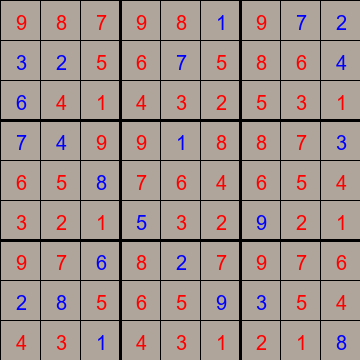

In [19]:
sudoku = load_sudoku("sudoku_extreme")
fixed = [[1 if sudoku[i][j] else 0 for j in range(9)] for i in range(9)]
squares = initial_fill()

row_counters = [[0 for _ in range(9)] for _ in range(9)]
col_counters = [[0 for _ in range(9)] for _ in range(9)]

for i in range(9):
        for j in range(9):
            row_counters[i][sudoku[i][j] - 1] += 1
            col_counters[j][sudoku[i][j] - 1] += 1

energy = compute_energy(sudoku)
show_sudoku(sudoku)

0


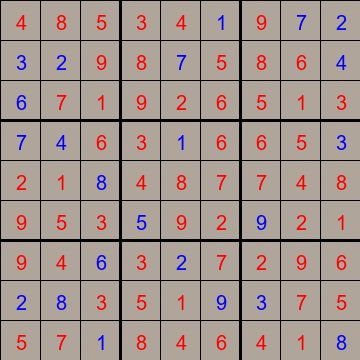

39
500


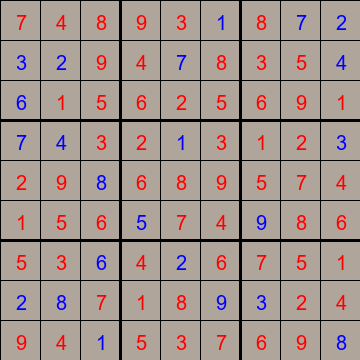

29
1000


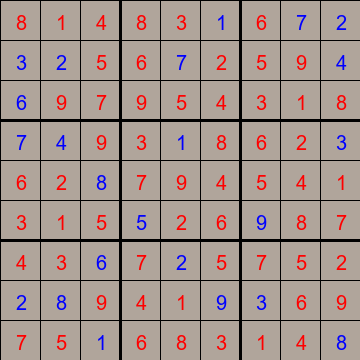

23
1500


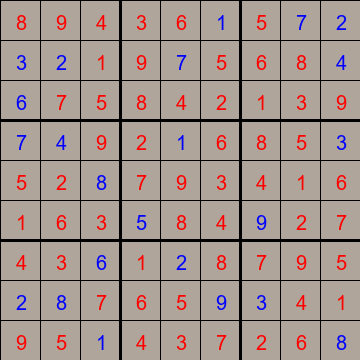

2
2000


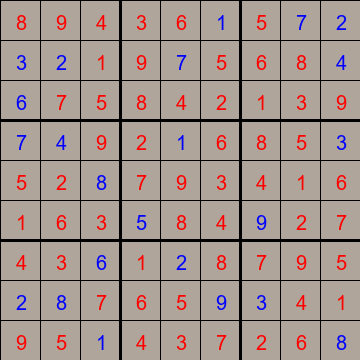

2
2500


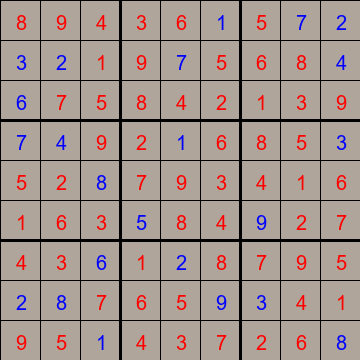

2
3000


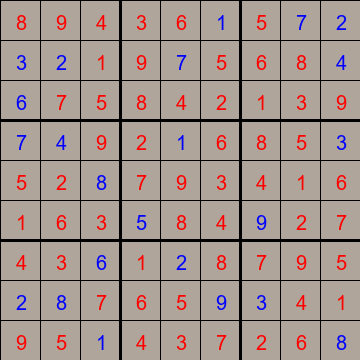

2
2000


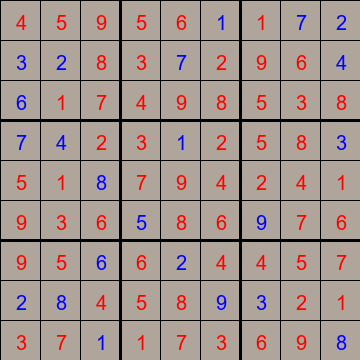

2
2500


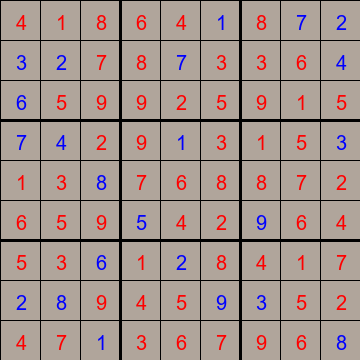

2
3000


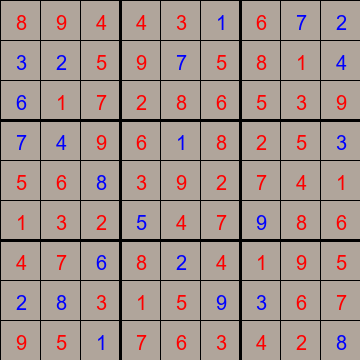

2
3500


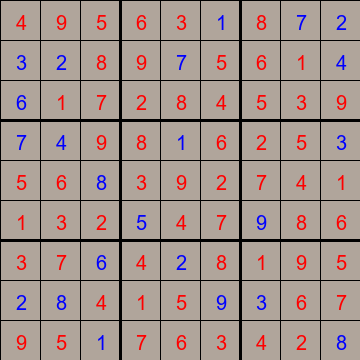

2
4000


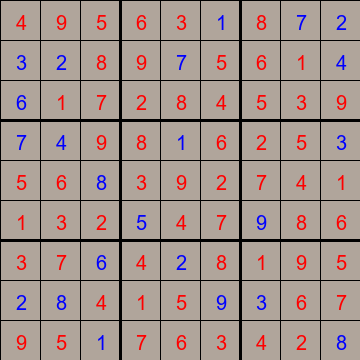

2
4500


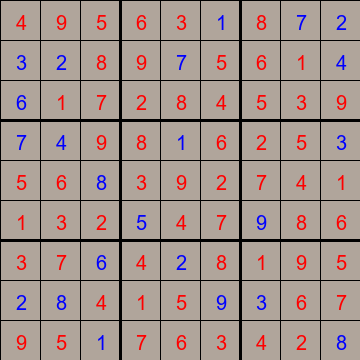

2
5000


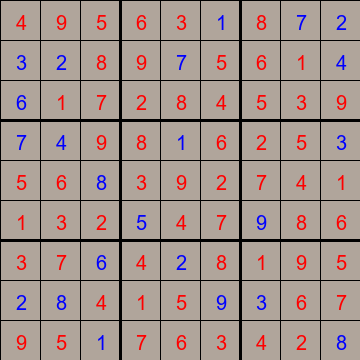

2
4000


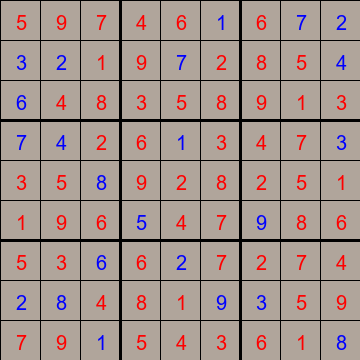

2
4500


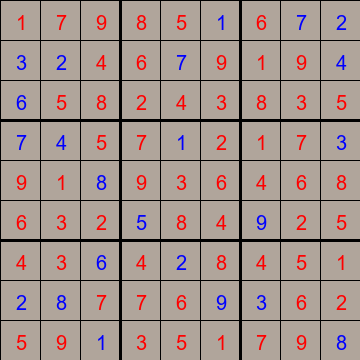

2
5000


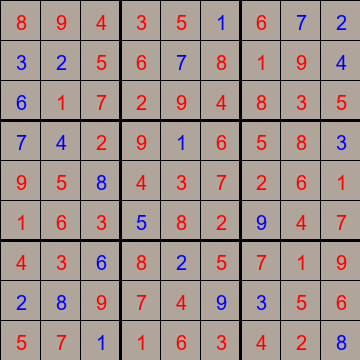

2
5500


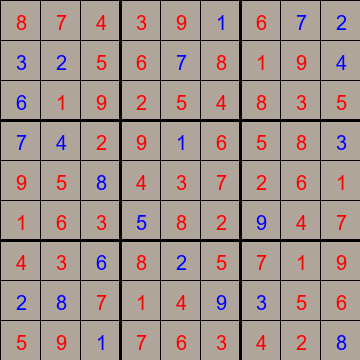

2


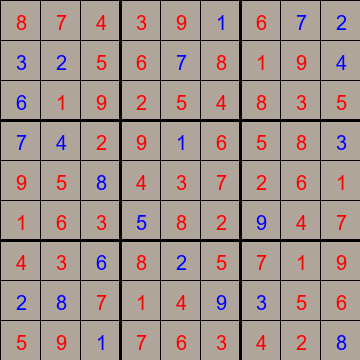

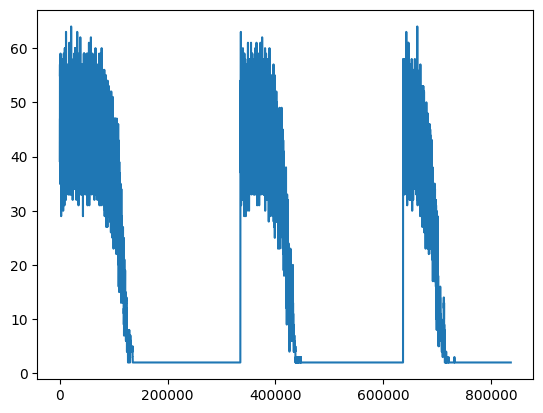

2


In [20]:
alpha = 0.997
T0 = 10
T = T0
energy_states = [energy]
best = energy
steps = 6000
start = 0
i = start
count = 0
j = 0
while i < steps:
    for _ in range(100):
        sq_id, a, b, delta = energy_change()
        new_state = generate_neighbor(sq_id=sq_id, a=a, b=b)
        next_energy = compute_energy(new_state)
        if next_energy < energy:
            sudoku = new_state
            energy = next_energy
        else:
            p1 = np.exp((energy - next_energy) / T)
            if p1 > np.random.uniform(0, 0.1):
                sudoku = new_state
                energy  = next_energy
        energy_states.append(energy)
        best = min(best, energy)
        if energy <= 4:
            count += 1
        else:
            count = 0
        if count >= 200000:
            T0 /= 1.5
            T = T0
            start += 1000
            i = start

    if best == 0:
        break

    T = T *alpha
    if i % 500 == 0:
        print(i)
        show_sudoku(sudoku)
        print(best)
    i += 1


plt.plot([i for i in range(len(energy_states))], energy_states)
show_sudoku(sudoku)
plt.show()
print(best)